In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import cmath
import math
from PIL import Image

# Question 1

In [2]:
img = cv2.imread('../imgs/book.jpg',0)
img = cv2.resize(img, (512,512))

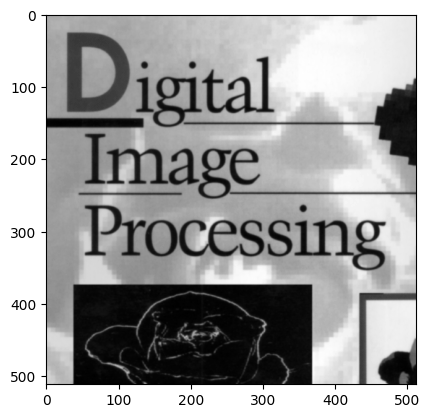

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
def blur(img, a, b, T):
    h,w = img.shape
    
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    
    filter_img = np.zeros((h,w), dtype = complex)
    
    x = int(h/2)
    y = int(w/2)
    
    for i in range(0,h):
        for j in range(0,w):
            temp = np.pi*(a*(i-x) + b*(j-y))
            
            if(abs(temp) > 0.0001):
                filter_img[i][j] = T*np.sin(temp)*np.exp(-1j*temp)/temp
            else: 
                filter_img[i][j] = T*np.exp(-1j*temp)
                
    blur_img_fft = filter_img*img_fft
    
    temp = np.fft.ifftshift(blur_img_fft)
    blur_img = np.fft.ifft2(temp)
                
    return blur_img

In [5]:
blur_img = blur(img, 0.1, 0.1, 1)

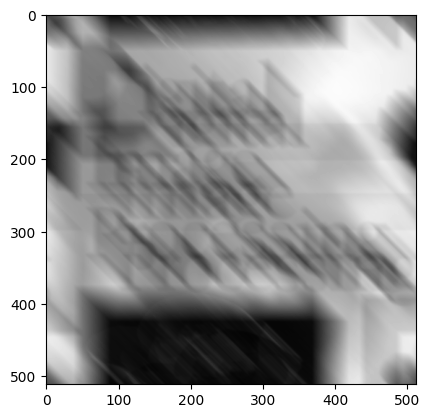

In [6]:
plt.imshow(np.abs(blur_img),vmin = 0,vmax = 255,cmap='gray')

In [7]:
def Gaussian_noise(img,mean,var):
    noise = np.random.normal(mean, np.sqrt(var), img.shape)
    
    noisy_img = abs(img) + noise

    noisy_img = noisy_img - np.min(noisy_img)
    noisy_img = noisy_img/np.max(noisy_img)
    noisy_img = 255*noisy_img
    noisy_img = noisy_img.astype('uint8')
    
    return noisy_img

In [8]:
noisy_img = Gaussian_noise(blur_img, 0, 650)

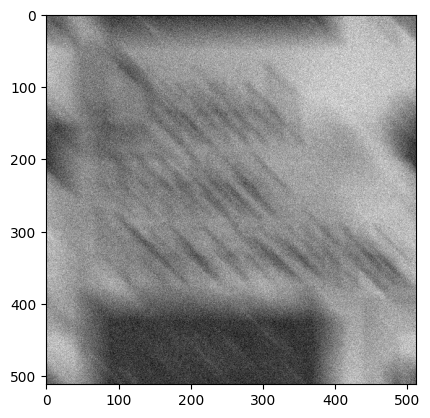

In [9]:
plt.imshow(noisy_img,vmin = 0,vmax = 255, cmap='gray')

In [10]:
def inverse_blur(img, a, b, T):
    h,w = img.shape
    
    inv_img_fft = np.fft.fftshift(np.fft.fft2(blur_img))
    
    inv_filter_img = np.zeros((h,w), dtype = complex)
    
    x = int(h/2)
    y = int(w/2)
    
    for i in range(0,h):
        for j in range(0,w):
            temp = np.pi*(a*(i-x) + b*(j-y))
            
            if(abs(np.sin(temp)) > 0.001):
                inv_filter_img[i][j] = temp/(T*np.sin(temp)*np.exp(-1j*temp))
            else:
                inv_filter_img[i][j] = T*np.exp(-1j*temp)
                
    inv_blur_img_fft = inv_filter_img*inv_img_fft
    
    temp = np.fft.ifftshift(inv_blur_img_fft)
    inv_blur_img = np.fft.ifft2(temp)
            
    return inv_blur_img

In [11]:
inv_blur_img = inverse_blur(blur_img, 0.1, 0.1, 1)

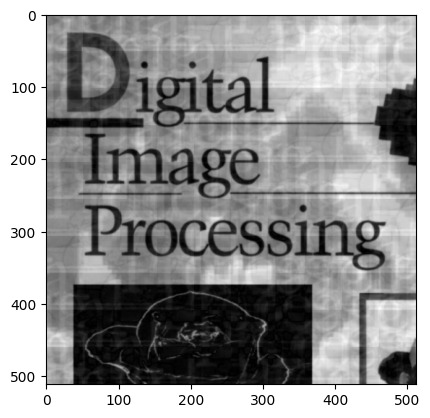

In [12]:
plt.imshow(np.abs(inv_blur_img), cmap='gray')

In [13]:
def Weiner(img, a, b, T, K):
    h,w = img.shape
    
    G = np.fft.fftshift(np.fft.fft2(img))
    
    weiner_filter_img = np.zeros((h,w), dtype = complex)
    
    x = int(h/2)
    y = int(w/2)
    
    for i in range(0,h):
        for j in range(0,w):
            temp = np.pi*(a*(i-x) + b*(j-y))
            
            if(abs(temp) > 0.0001):
                H = (T*np.sin(temp))*(np.exp(-1j*temp))/temp
                if(np.abs(H) >= 0.001):
                    weiner_filter_img[i][j] = (1/H)*((np.abs(H)**2)/(np.abs(H)**2 + K))
                else:
                    weiner_filter_img[i][j] = 0
            else:
                weiner_filter_img[i][j] = T*np.exp(-1j*temp)
                
    weiner_img_fft = weiner_filter_img*G
    
    weiner_img = np.fft.ifft2(np.fft.ifftshift(weiner_img_fft))
            
    return weiner_img

In [14]:
weiner_img = Weiner(noisy_img, 0.1, 0.1, 1, 0.01)

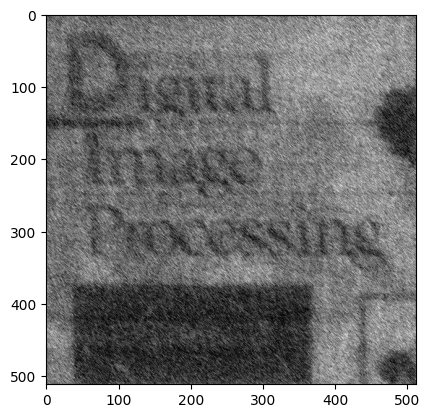

In [15]:
plt.imshow(np.abs(weiner_img), cmap='gray')

In [16]:
noisy_img1 = Gaussian_noise(blur_img, 0, 1)
noisy_img2 = Gaussian_noise(blur_img, 0, 15)
noisy_img3 = Gaussian_noise(blur_img, 0, 450)
noisy_img4 = Gaussian_noise(blur_img, 0, 900)

In [17]:
weiner_img1 = Weiner(noisy_img1, 0.1, 0.1, 1, 0.01)
weiner_img2 = Weiner(noisy_img2, 0.1, 0.1, 1, 0.01)
weiner_img3 = Weiner(noisy_img3, 0.1, 0.1, 1, 0.01)
weiner_img4 = Weiner(noisy_img4, 0.1, 0.1, 1, 0.01)

Text(0.5, 1.0, 'Mean = 0 and Var = 900')

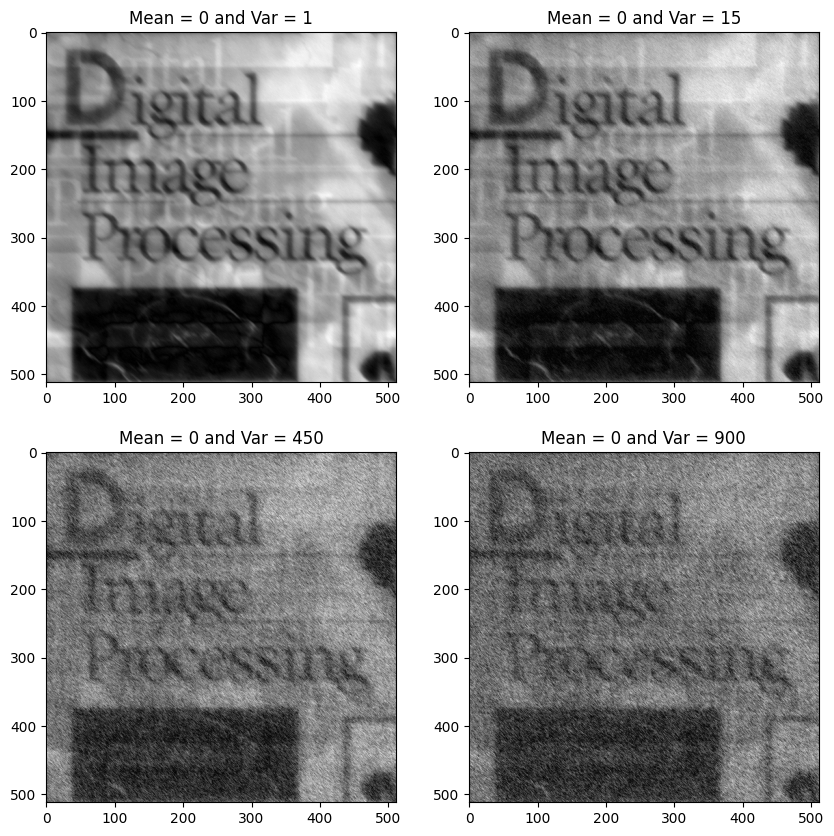

In [18]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(np.abs(weiner_img1), cmap='gray')
plt.title("Mean = 0 and Var = 1")

plt.subplot(2,2,2)
plt.imshow(np.abs(weiner_img2), cmap='gray')
plt.title("Mean = 0 and Var = 15")

plt.subplot(2,2,3)
plt.imshow(np.abs(weiner_img3), cmap='gray')
plt.title("Mean = 0 and Var = 450")

plt.subplot(2,2,4)
plt.imshow(np.abs(weiner_img4), cmap='gray')
plt.title("Mean = 0 and Var = 900")

Weiner filter Removes the additive noise and inverts the blurring simultaneously.

Above outputs show that the filter works well till noise of var=100, and can be optimised for higher var by increasing K to a limit. But increasing K too much nullifies the effect of inverting the motion blur, so there is a tradeoff.

# Question 2

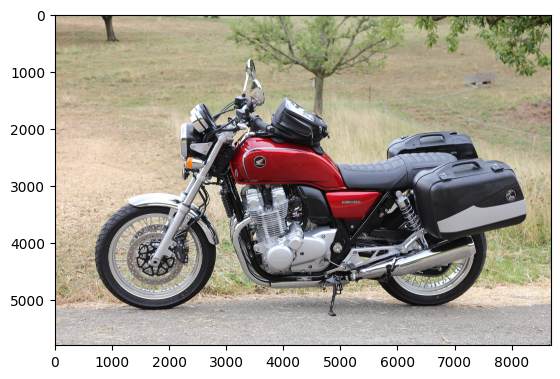

In [19]:
img = Image.open('../imgs/test.raw')
plt.imshow(img)

## Huffman Coding

In [20]:
class HuffmanNodes:
    def __init__(self, count, char, left=None, right=None):
        self.left = left
        self.right = right
        self.char = char
        self.count = count
        self.code = ''


def coding(node, codes={}, key={}, val=''):
    newVal = val + str(node.code)

    if(node.left):
        [codes, key] = coding(node.left, codes, key, newVal)
    if(node.right):
        [codes, key] = coding(node.right, codes, key, newVal)

    if(not node.left and not node.right):
        codes[newVal] = node.char
        key[node.char] = newVal

    return [codes, key]


def huffman_encoding(img):
    data = img.flatten()
    freq = {}
    list_ch = []
    
    for i in data:
        if i not in list_ch:
            list_ch.append(i)
            freq[i] = 1

        else:
            freq[i] += 1
        
    freq_temp = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    
    list_ch = list(freq.keys())
    
    nodes = []
    for x in range(len(list_ch)):
        nodes.append(HuffmanNodes(freq[list_ch[x]], list_ch[x]))

    while (len(nodes) > 1):
        nodes.sort(key=lambda x: x.count)
        
        left = nodes[0]
        right = nodes[1]

        left.code = 0
        right.code = 1

        new_node = HuffmanNodes(left.count+right.count,left.char+right.char, left, right)

        nodes.remove(left)
        nodes.remove(right)
        nodes.append(new_node)

    [codes, key] = coding(nodes[0])
    encode = ''

    for i in data:
        encode += key[i]
        
    return encode, key

In [21]:
def huffman_decoding(encode, code, shape):
    decode = []
    while encode:
        for i in code:
            if encode.startswith(code[i]):
                decode.append(str(i))
                encode = encode[len(code[i]):]
                break
    return np.array(decode).reshape(shape).astype(np.uint8)

/tmp/ipykernel_72582/72296994.py:55: RuntimeWarning: overflow encountered in ubyte_scalars
  new_node = HuffmanNodes(left.count+right.count,left.char+right.char, left, right)


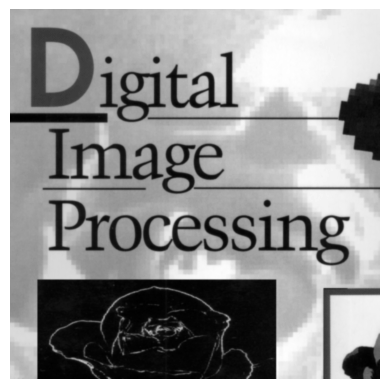

Compression ratio: 1.0726905191402958


In [22]:
img = cv2.imread('../imgs/book.jpg', 0)
encoded, code = huffman_encoding(img)
decoded = huffman_decoding(encoded, code, img.shape)
plt.imshow(decoded, cmap='gray')
plt.axis('off')
plt.show()
compression_ratio = img.size / (len(encoded)/8)
print('Compression ratio: {}'.format(compression_ratio))

Huffman compression ratio is decently high for a variety of larger data and it has betterr communication fidelity but it is very slow and requires heavy computation.

## LZW 

In [23]:
def lzw_encoding(img):
    data = img.flatten()

    dict_size = 256
    dictionary = dict((chr(i), chr(i)) for i in range(dict_size))

    w = ""
    encode = []
    for c in data:
        wc = w + chr(c)
        if wc in dictionary:
            w = wc
        else:
            encode.append(dictionary[w])
            
            dictionary[wc] = dict_size
            dict_size += 1
            w = chr(c)

    if w:
        encode.append(dictionary[w])
    
    return encode

In [26]:
def lzw_decoding(encode):
    dict_size = 256
    dictionary = dict((chr(i), chr(i)) for i in range(dict_size))

    w = decode = encode.pop(0)
    for k in encode:
        if k in dictionary:
            entry = dictionary[k]
        elif k == dict_size:
            entry = w + w[0]
            
        decode += entry
        
        dictionary[dict_size] = w + entry[0]
        dict_size += 1

        w = entry
    
    return np.array([ord(i) for i in decode]).reshape(img.shape)

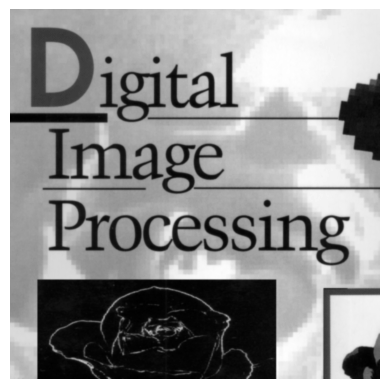

Compression ratio: 3.46553819571552


In [27]:
img = cv2.imread('../imgs/book.jpg', 0)
encoded = lzw_encoding(img)
decoded = lzw_decoding(encoded)
plt.imshow(decoded, cmap='gray')
plt.axis('off')
plt.show()
compression_ratio = img.size / len(encoded)
print('Compression ratio: {}'.format(compression_ratio))

Lzw is fast and easy to implement as all codes are of same fixed length but it does not work well incase of repeating pattern and amount of storage needed is indeterminate as it epends on the total length of all the strings.

## RLE

In [28]:
def rle_encoding(img):
    data = img.flatten()
    
    encode = []
    i = 0
 
    while (i <= len(data)-1):
        count = 1
        ch = data[i]
        j = i
        while (j < len(data)-1):
            if (data[j] == data[j+1]):
                count = count+1
                j = j+1
            else:
                break
        encode.append((data[i], count))
        i = j+1
    return encode

In [29]:
def rle_decoding(encode):
    decode = []
    for i in range(len(encode)):
        decode += [encode[i][0]] * encode[i][1]
    return np.array(decode).reshape(img.shape)

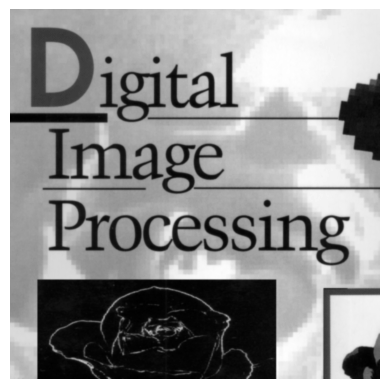

Compression ratio: 1.4711409062230967


In [30]:
img = cv2.imread('../imgs/book.jpg', 0)
encoded = rle_encoding(img)
decoded = rle_decoding(encoded)
plt.imshow(decoded, cmap='gray')
plt.axis('off')
plt.show()
compression_ratio = img.size / len(encoded)
print('Compression ratio: {}'.format(compression_ratio))

RLE is fast and easy to implement and can be stacked with other encoding techniques but it has low compression ratio and might increase the size of image by larger factor.

## DCT

In [31]:
def dct_encoding(img):
    h,w = img.shape
    
    r = np.arange(h)
    c = np.arange(w)
    col,row = np.meshgrid(r,c)
    
    temp = np.zeros(img.shape)
    encode = np.zeros(img.shape)
    
    
    temp = ((2/h)**0.5)*np.cos((np.pi*(2*col+1)*row)/(2*h))
    
    comp = np.dot(temp,np.dot(img.astype(float)/255.0,temp.T))
    
    k=70
    encode[:k,:k] = comp[:k,:k]
    
    return encode, k

In [32]:
def  dct_decoding(encode, shape):
    temp = np.zeros(shape)
    
    h,w = shape
    
    r = np.arange(h)
    c = np.arange(w)
    col,row = np.meshgrid(r,c)
    
    temp = ((2/h)**0.5)*np.cos((np.pi*(2*col+1)*row)/(2*h))
    
    decode = np.dot(temp.T,np.dot(encode,temp))
    
    return decode

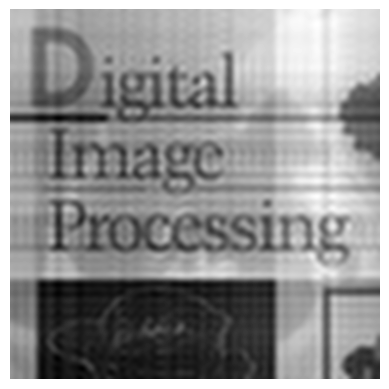

Compression ratio: 96.6008163265306


In [33]:
img = cv2.imread('../imgs/book.jpg', 0)
encode, k = dct_encoding(img)
decode = dct_decoding(encode, img.shape)
plt.imshow(decode, cmap='gray')
plt.axis('off')
plt.show()
compression_ratio = img.size / (k*k)
print('Compression ratio: {}'.format(compression_ratio))

DCT minimizes blocking artifacts and handle interpixel redundancy, it gives fairly larger compression ratio as it is lossy compression technique. It is computationally heavy in case of larger frequencies and image information is lost and cannot be restored.